<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Importing-dataset" data-toc-modified-id="Importing-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing dataset</a></span></li><li><span><a href="#Stationary-test" data-toc-modified-id="Stationary-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stationary test</a></span><ul class="toc-item"><li><span><a href="#Rolling-mean" data-toc-modified-id="Rolling-mean-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rolling mean</a></span></li><li><span><a href="#ADF-/-Augmented-Dickey-Fuller-test" data-toc-modified-id="ADF-/-Augmented-Dickey-Fuller-test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ADF / Augmented Dickey-Fuller test</a></span></li><li><span><a href="#ADF-test---Taking-log-of-data" data-toc-modified-id="ADF-test---Taking-log-of-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ADF test - Taking log of data</a></span></li><li><span><a href="#Kwiatkowski-Phillips-Schmidt-Shin-/-KPSS-Test" data-toc-modified-id="Kwiatkowski-Phillips-Schmidt-Shin-/-KPSS-Test-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Kwiatkowski-Phillips-Schmidt-Shin / KPSS Test</a></span></li><li><span><a href="#Stationary-conclusion" data-toc-modified-id="Stationary-conclusion-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Stationary conclusion</a></span></li></ul></li><li><span><a href="#Time-series-decomposition" data-toc-modified-id="Time-series-decomposition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time-series decomposition</a></span><ul class="toc-item"><li><span><a href="#stationary" data-toc-modified-id="stationary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>stationary</a></span></li><li><span><a href="#non-stationary" data-toc-modified-id="non-stationary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>non-stationary</a></span></li></ul></li><li><span><a href="#Finding-order-of-differencing-for-SARIMA-model" data-toc-modified-id="Finding-order-of-differencing-for-SARIMA-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding order of differencing for SARIMA model</a></span></li><li><span><a href="#Finding-order-in-AR-term" data-toc-modified-id="Finding-order-in-AR-term-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Finding order in AR term</a></span></li><li><span><a href="#SARIMA-model" data-toc-modified-id="SARIMA-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>SARIMA model</a></span><ul class="toc-item"><li><span><a href="#(1,1,1)-model-for-14-days" data-toc-modified-id="(1,1,1)-model-for-14-days-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>(1,1,1) model for 14 days</a></span></li><li><span><a href="#(7,1,7)-model-for-14-days" data-toc-modified-id="(7,1,7)-model-for-14-days-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>(7,1,7) model for 14 days</a></span></li><li><span><a href="#Making-predictions" data-toc-modified-id="Making-predictions-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Making predictions</a></span></li></ul></li><li><span><a href="#Modelling-with-pyramid-arima" data-toc-modified-id="Modelling-with-pyramid-arima-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelling with pyramid-arima</a></span></li><li><span><a href="#Forecasting-with-pyramid-arima" data-toc-modified-id="Forecasting-with-pyramid-arima-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Forecasting with pyramid-arima</a></span><ul class="toc-item"><li><span><a href="#Creating-monthly-aggregated-dataframe" data-toc-modified-id="Creating-monthly-aggregated-dataframe-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Creating monthly aggregated dataframe</a></span></li></ul></li><li><span><a href="#Facebook-Prophet" data-toc-modified-id="Facebook-Prophet-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Facebook-Prophet</a></span><ul class="toc-item"><li><span><a href="#Comparing-SARIMA-and-F-Prophet" data-toc-modified-id="Comparing-SARIMA-and-F-Prophet-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Comparing SARIMA and F-Prophet</a></span></li><li><span><a href="#Predicting-the-next-2-years" data-toc-modified-id="Predicting-the-next-2-years-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Predicting the next 2 years</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Future-work" data-toc-modified-id="Future-work-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Future work</a></span></li></ul></li></ul></div>

### Import libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings("ignore")


# Time series analysis
from statsmodels.api import tsa # time series analysis

# Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

# KPSS test
from statsmodels.tsa.stattools import kpss

# decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt

import pmdarima as pm

from fbprophet import Prophet

### Importing dataset
Note: I am using the dataset that does not contain any dropped rows.

In [116]:
BikeShareToronto_df = pd.read_csv("BikeShareTorontoFull_data.csv")
BikeShareToronto_df.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,start_date,start_time,end_date,end_time
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Annual Member,2017/01/01,00:00:00,2017/01/01,00:03:00
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Annual Member,2017/01/01,00:00:00,2017/01/01,00:05:00
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Annual Member,2017/01/01,00:05:00,2017/01/01,00:29:00
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Annual Member,2017/01/01,00:07:00,2017/01/01,00:21:00
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Annual Member,2017/01/01,00:08:00,2017/01/01,00:12:00


Goal is to have 1 column that contains the number of trips in a day. The index of that dataframe would contain the date.

In [117]:
BikeShareToronto_df["start_date"].value_counts()

2021/06/05    27346
2021/05/16    27029
2021/05/24    26023
2021/06/12    25334
2021/05/15    24640
              ...  
2017/12/26      263
2018/01/01      246
2019/01/20      222
2017/12/25      115
2018/04/15      107
Name: start_date, Length: 1759, dtype: int64

In [118]:
BikeShareToronto_df = BikeShareToronto_df.set_index(pd.DatetimeIndex(BikeShareToronto_df['start_date']))

In [119]:
BikeShareToronto_df.index.names=["date"]

In [120]:
BikeShareToronto_df

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,start_date,start_time,end_date,end_time
date,,,,,,,,,,,,,
2017-01-01,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Annual Member,2017/01/01,00:00:00,2017/01/01,00:03:00
2017-01-01,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Annual Member,2017/01/01,00:00:00,2017/01/01,00:05:00
2017-01-01,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Annual Member,2017/01/01,00:05:00,2017/01/01,00:29:00
2017-01-01,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Annual Member,2017/01/01,00:07:00,2017/01/01,00:21:00
2017-01-01,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Annual Member,2017/01/01,00:08:00,2017/01/01,00:12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,14635195,2021-11-30 23:56:00,2021-12-01 00:02:00,359.0,7121,Jarvis St / Dundas St E,7110.0,Queen St E / Berkeley St,Annual Member,2021/11/30,23:56:00,2021/12/01,00:02:00
2021-11-30,14635196,2021-11-30 23:57:00,2021-12-01 00:21:00,1464.0,7022,Simcoe St / Queen St W,7001.0,Wellesley Station Green P,Casual Member,2021/11/30,23:57:00,2021/12/01,00:21:00
2021-11-30,14635197,2021-11-30 23:57:00,2021-12-01 00:16:00,1123.0,7020,Phoebe St / Spadina Ave,7152.0,Ossington Ave / Bloor St W,Casual Member,2021/11/30,23:57:00,2021/12/01,00:16:00


In [121]:
# trip count - group by statement
BikeShareTS = pd.DataFrame(BikeShareToronto_df.groupby(by="start_date")["start_date"].count())

In [122]:
# trip count - group by statement
BikeShareTS = pd.DataFrame(BikeShareToronto_df.groupby(by="start_date")["start_date"].count())

# Renaming column
BikeShareTS.rename(columns={"start_date":"trip_count"}, inplace=True)

In [123]:
BikeShareTS.sort_index(inplace=True)

In [ ]:
# Check 
BikeShareTS.head()

Can confirm that it has been properly loaded. Time to test to validate stationarity of data.

### Stationary test

There are 2 main tests I want to run: Rolling mean (visual test) and Augmented Dickey-Fuller test (statistical approach).

#### Rolling mean

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

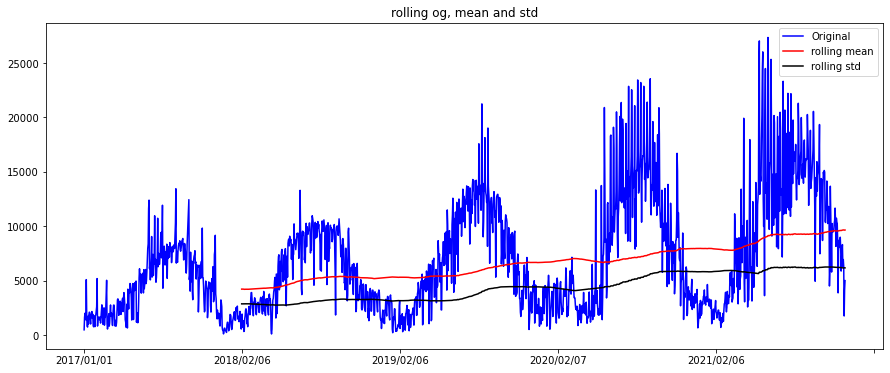

In [124]:
fig, ax = plt.subplots(figsize=(15,6))

# rolling stats
rolmean= BikeShareTS.rolling(window=365).mean()
rolstd = BikeShareTS.rolling(window=365).std()

year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)

orig = plt.plot(BikeShareTS, color="Blue", label="Original")
rol_mean = plt.plot(rolmean, color="Red", label="rolling mean")
rol_std = plt.plot(rolstd, color="Black", label="rolling std")
plt.legend()
plt.title("rolling og, mean and std")
plt.show()

Through this visual aid, I can see that the rolling mean and std are not constant. Has somewhat of an upward trend, thus the data is not stationary.

#### ADF / Augmented Dickey-Fuller test
Null Hypothesis: Seriues has a unit root and is non stationary.

Alternate Hypothesis: Series is stationary.

In [125]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(BikeShareTS["trip_count"], regression="ct")

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "Number of lags used", "Number of oberservations used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)

# dftest

Results of Dickey-Fuller Test:
Test Statistic                     -2.678113
p-value                             0.245282
Number of lags used                25.000000
Number of oberservations used    1733.000000
critical value (1%)                -3.964003
critical value (5%)                -3.413026
critical value (10%)               -3.128543
dtype: float64


In [126]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(BikeShareTS["trip_count"], autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "Number of lags used", "Number of oberservations used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)

# dftest

Results of Dickey-Fuller Test:
Test Statistic                     -2.626864
p-value                             0.087571
Number of lags used                25.000000
Number of oberservations used    1733.000000
critical value (1%)                -3.434129
critical value (5%)                -2.863209
critical value (10%)               -2.567659
dtype: float64


p-value is greater than 0.05, data is not stationary.

Let's check the difference.

In [127]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(BikeShareTS["trip_count"].diff().dropna(), autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "Number of lags used", "Number of oberservations used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)

# dftest

Results of Dickey-Fuller Test:
Test Statistic                  -8.221275e+00
p-value                          6.419831e-13
Number of lags used              2.500000e+01
Number of oberservations used    1.732000e+03
critical value (1%)             -3.434131e+00
critical value (5%)             -2.863210e+00
critical value (10%)            -2.567659e+00
dtype: float64


In [128]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(BikeShareTS["trip_count"].diff().dropna(), regression="c")

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "Number of lags used", "Number of oberservations used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)

# dftest

Results of Dickey-Fuller Test:
Test Statistic                  -8.221275e+00
p-value                          6.419831e-13
Number of lags used              2.500000e+01
Number of oberservations used    1.732000e+03
critical value (1%)             -3.434131e+00
critical value (5%)             -2.863210e+00
critical value (10%)            -2.567659e+00
dtype: float64


p-value is less than 0.05, thus there's evidence to state that the series with difference is stationary.

#### ADF test - Taking log of data

This is me just checking if the data is stationary on a log scale.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

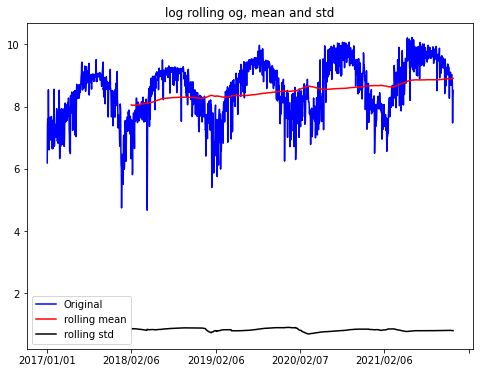

In [129]:
# Estimating trend

# figure and axis
fig, ax = plt.subplots(figsize=(8,6))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)

# log
log_BikeShareTS = np.log(BikeShareTS)

# rolling stats
log_rolmean= log_BikeShareTS.rolling(window=365).mean()
log_rolstd = log_BikeShareTS.rolling(window=365).std()

# plot
log_orig = plt.plot(log_BikeShareTS, color="Blue", label="Original")
log_rol_mean = plt.plot(log_rolmean, color="Red", label="rolling mean")
log_rol_std = plt.plot(log_rolstd, color="Black", label="rolling std")

plt.legend()
plt.title("log rolling og, mean and std")
plt.show()

# plt.plot(BikeShareTS_logscale)

The rolling standard deviation shows that the data is somewhat stationary. Will run the ADF test now.

In [130]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(log_BikeShareTS["trip_count"], autolag="AIC")

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "Number of lags used", "Number of oberservations used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                     -2.888611
p-value                             0.046689
Number of lags used                24.000000
Number of oberservations used    1734.000000
critical value (1%)                -3.434127
critical value (5%)                -2.863208
critical value (10%)               -2.567658
dtype: float64


p-value is less than 0.05 rejecting the null hypothesis, thus the log of the data is stationary.

#### Kwiatkowski-Phillips-Schmidt-Shin / KPSS Test
To test for trend stationary. Do need to note that the p-value is opposite to the adfuller test.

Null Hypothesis: Series is stationary.

Alternate Hypothesis: Series is not stationary since series has a unit root.

In [131]:
print("Results of KPSS Test:")
dftest = kpss(BikeShareTS["trip_count"])

dfoutput = pd.Series(dftest[0:3], index=["Test Statistic", "p-value", "Number of lags used"])
for key,value in dftest[3].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)


Results of KPSS Test:
Test Statistic            1.700582
p-value                   0.010000
Number of lags used      25.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64


p-value is less than 0.05 thus not stationary

In [132]:
# lets test it around the trend using ct, this will be a better test to use because of the actual trend of the data
# ct = The data is stationary around a trend.
print("Results of KPSS Test with ct regression:")
dftest = kpss(BikeShareTS["trip_count"], regression="ct")

dfoutput = pd.Series(dftest[0:3], index=["Test Statistic", "p-value", "Number of lags used"])
for key,value in dftest[3].items():
    dfoutput["critical value (%s)"%key] = value
    
print(dfoutput)

Results of KPSS Test with ct regression:
Test Statistic            0.106966
p-value                   0.100000
Number of lags used      25.000000
critical value (10%)      0.119000
critical value (5%)       0.146000
critical value (2.5%)     0.176000
critical value (1%)       0.216000
dtype: float64


p-value is greater than 0.05. Due to the lack of evidence, we cannot reject the null hypothesis. Therefore, the series is stationary.

#### Stationary conclusion
The rolling mean test visually showed that the mean and variance were not constant due to the upward trend.
The ADF test on base data proved that the data was not stationary. However, the ADF test on the log of the base data proved to be stationary.

After running the KPSS test, we can conclude that the series is stationary around the deterministic trend. I will be building an/a ARIMA/SARIMA model that can be used for forecasting.

### Time-series decomposition
Using `seasonal_decompose` function to decompose datasets into trend, seasonality and residual.

#### stationary

In [134]:
# Decompose the time series
log_decomposition = tsa.seasonal_decompose(log_BikeShareTS, model='additive', period=365)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


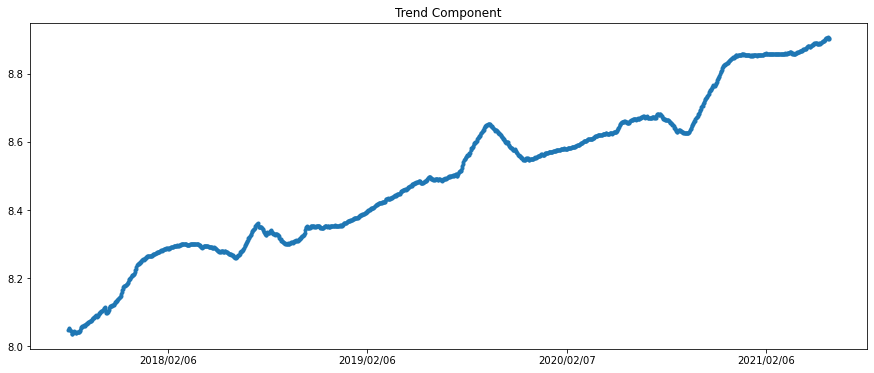

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


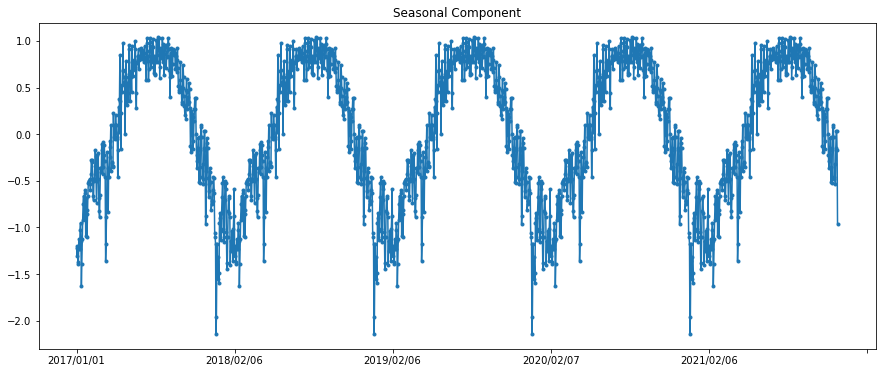

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


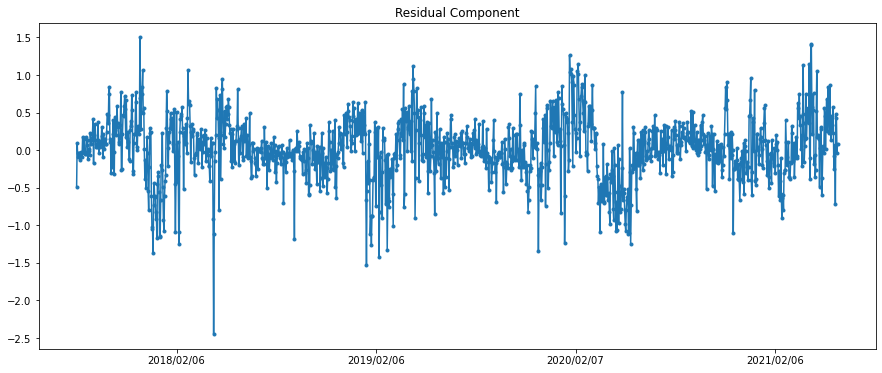

In [135]:
# Trend
plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(log_decomposition.trend, marker='.')
plt.title('Trend Component')
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)
plt.show();

# Seasonal component
plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(log_decomposition.seasonal, marker='.')
plt.title('Seasonal Component')
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)
plt.show();

# Residuals
plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(log_decomposition.resid, marker='.')
plt.title('Residual Component')
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)
plt.show();

#fig = decomposition.plot()
#plt.show()

Interesting to see spikes during mid/late 2018 and 2019 while a drop mid/late 2020 in the trend component.

#### non-stationary

In [136]:
# Decompose the time series
decomposition = tsa.seasonal_decompose(BikeShareTS, model='additive', period=365)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


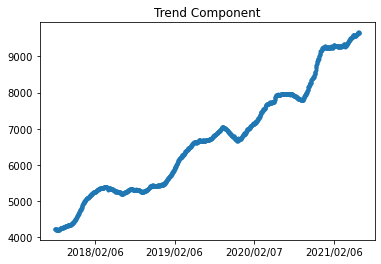

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


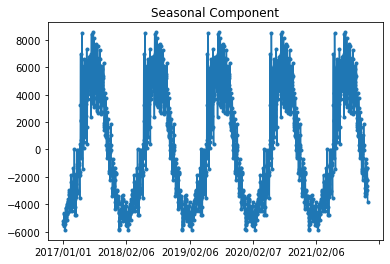

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


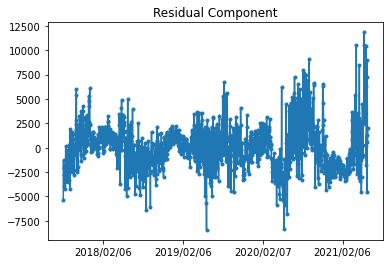

In [137]:
# Trend
plt.figure()
ax = plt.gca()
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)
plt.show();

# Seasonal component
plt.figure()
ax = plt.gca()
plt.plot(decomposition.seasonal, marker='.')
plt.title('Seasonal Component')
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)
plt.show();

# Residuals
plt.figure()
ax = plt.gca()
plt.plot(decomposition.resid, marker='.')
plt.title('Residual Component')
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)
plt.show();

#fig = decomposition.plot()
#plt.show()

### Finding order of differencing for SARIMA model
Since there's a seasonal component, I will be building a SARIMA model. Will see if the series has some information in the lag. Will look at the auto-correlation function (acf).

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

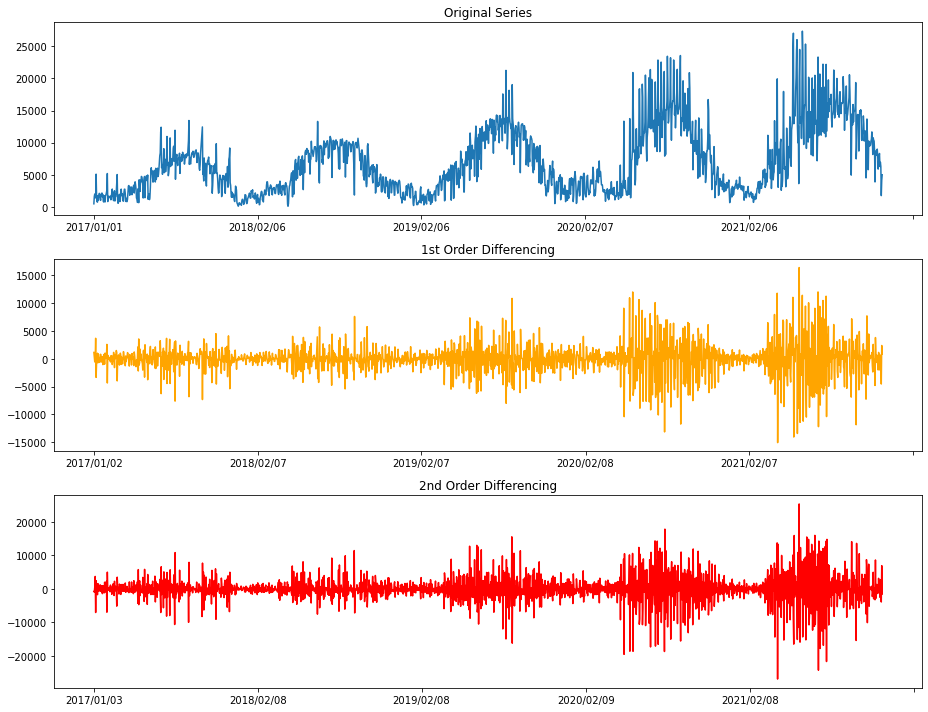

In [138]:
# timeseries compared to when we take the 1st and 2nd difference 
plt.subplots(3, 1, figsize=(13,10))

# orginal series
plt.subplot(3,1,1)
# plt.figure()
plt.plot(BikeShareTS)
plt.title('Original Series')
ax = plt.gca()
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%Y "))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)

plt.subplot(3,1,2)
# plt.figure()
plt.plot(BikeShareTS.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%Y "))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)

plt.subplot(3,1,3)
# plt.figure()
plt.plot(BikeShareTS.diff().diff().dropna(), c='red')
plt.title('2nd Order Differencing')
ax = plt.gca()
# ax.autoscale(enable=True, axis='x', tight=True)
# ax.xaxis.set_major_formatter(DateFormatter("%Y "))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)

plt.tight_layout()
plt.show()

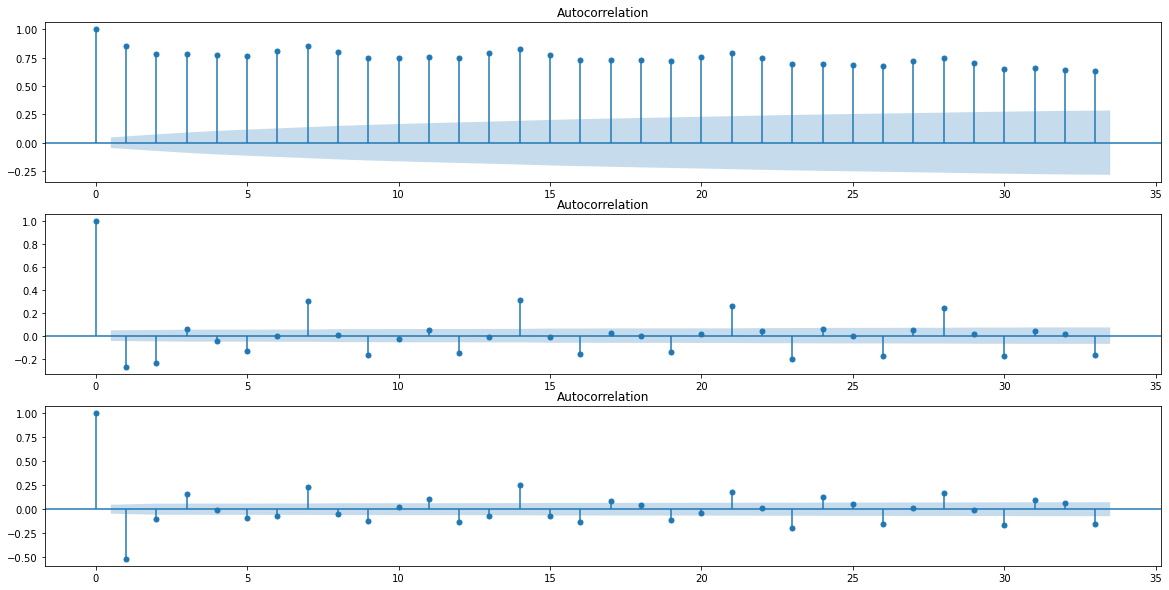

In [139]:
# autocorrelation plots for a better idea of differencing
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(BikeShareTS, ax=ax[0])
fig = plot_acf(BikeShareTS.diff().dropna(), ax=ax[1])
fig = plot_acf(BikeShareTS.diff().diff().dropna(), ax=ax[2])

Based off the visuals above, the time series reaches stationary after one differencing. d=1 for ARIMA model.

As for the p term, 1 and 7 seem like a fit.

### Finding order in AR term

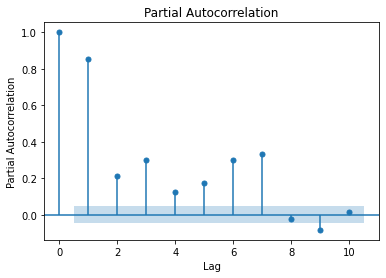

In [140]:
plot_pacf(BikeShareTS, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

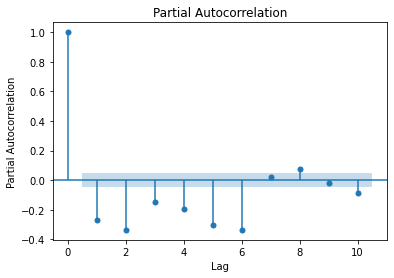

In [141]:
plot_pacf(BikeShareTS.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

1 seems like to fit q.

### SARIMA model
SARIMA accounts for seasonal patterns.

In [142]:
# Splitting test and train
test_percent = .15
test_number = int(BikeShareTS.shape[0]*test_percent)
train = BikeShareTS[:-test_number]
test = BikeShareTS[-test_number:]

In [143]:
train.shape

(1496, 1)

In [144]:
test.shape

(263, 1)

#### (1,1,1) model for 14 days

In [169]:
model_s = SARIMAX(train, order=(1,1,1), 
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)

Coefficients: drift    -2.019576e-03
ar.L1     2.946477e-01
ma.L1    -8.695420e-01
sigma2    4.414417e+06
dtype: float64


In [170]:
print(model_fit_s.aic)

26893.036390963618


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


RMSE:  3233.694174829892


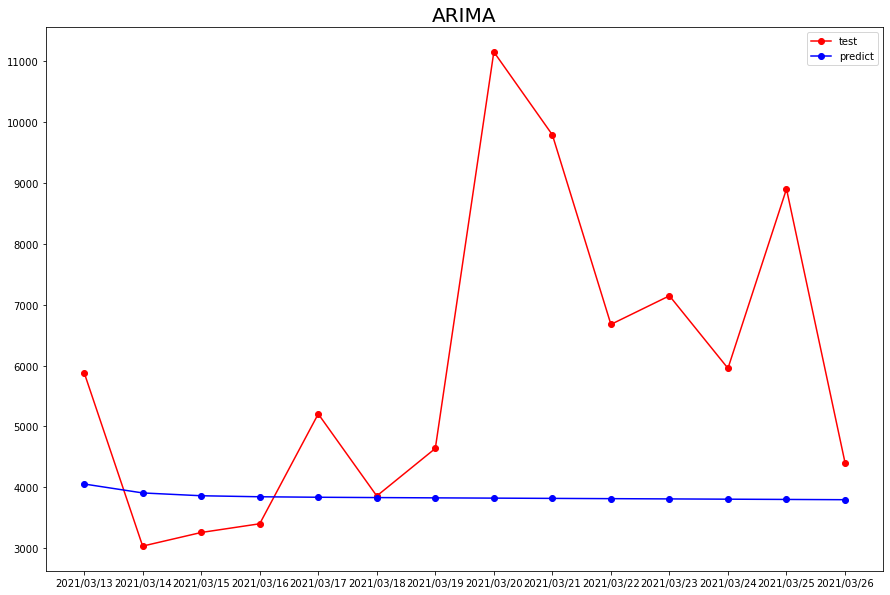

In [171]:
predictions = model_fit_s.predict(start=len(train), end=len(train)+len(test)-1, typ="levels", index= test.index)

print("RMSE: ", sqrt(mean_squared_error(test[:14], predictions[:14])))
plt.figure(figsize=(15,10))
plt.plot(test[:14], c="red", label="test", marker='o')
plt.plot(predictions[:14], c="blue", label="predict", marker='o')
plt.legend()
plt.title('ARIMA', fontsize=(20))
plt.show();

In [148]:
print("MAE: ", mean_absolute_error(test[:14], predictions[:14]))

MAE:  2237.8959561306538


Model looks very bad. WIll look into the model that has p and q as 7. 

#### (7,1,7) model for 14 days

In [172]:
model_s = SARIMAX(train, order=(7,1,7), 
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)

Coefficients: drift    -6.376250e-03
ar.L1     4.465907e-02
ar.L2    -6.530595e-01
ar.L3    -2.578851e-01
ar.L4    -2.780239e-01
ar.L5    -6.261022e-01
ar.L6     5.701329e-02
ar.L7     1.521061e-01
ma.L1    -6.406988e-01
ma.L2     5.116101e-01
ma.L3    -8.961940e-02
ma.L4    -8.354759e-02
ma.L5     4.573989e-01
ma.L6    -5.391466e-01
ma.L7    -5.196358e-02
sigma2    3.141911e+06
dtype: float64


In [173]:
print(model_fit_s.aic)

26428.47105096598


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


RMSE:  3099.5637710633596


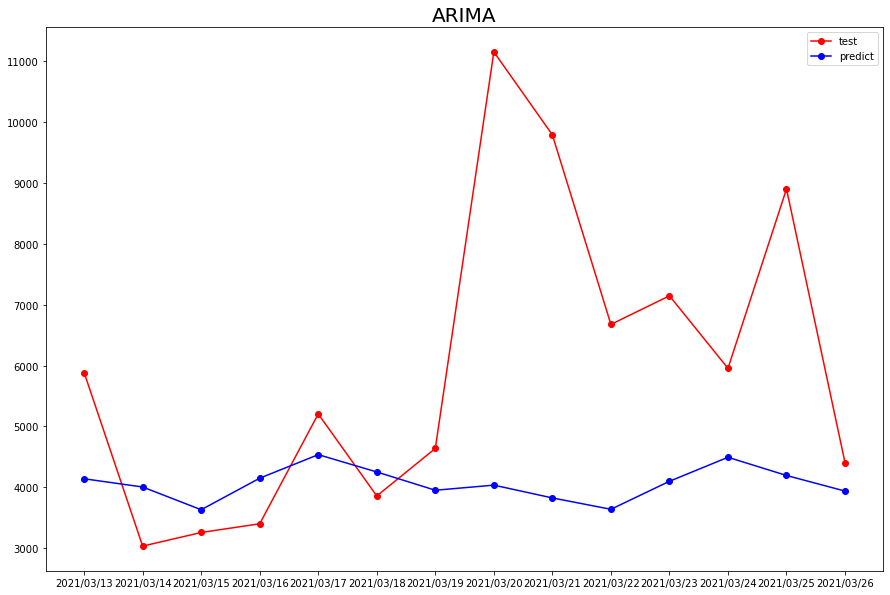

In [174]:
predictions = model_fit_s.predict(start=len(train), end=len(train)+len(test)-1, typ="levels", index= test.index)

print("RMSE: ", sqrt(mean_squared_error(test[:14], predictions[:14])))
plt.figure(figsize=(15,10))
plt.plot(test[:14], c="red", label="test", marker='o')
plt.plot(predictions[:14], c="blue", label="predict", marker='o')
plt.legend()
plt.title('ARIMA', fontsize=(20))
plt.show();

In [175]:
print("MAE: ", mean_absolute_error(test[:14], predictions[:14]))

MAE:  2237.8959561306538


Slightly better than the rpevious model but still is bad in my opinion.

#### Making predictions

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


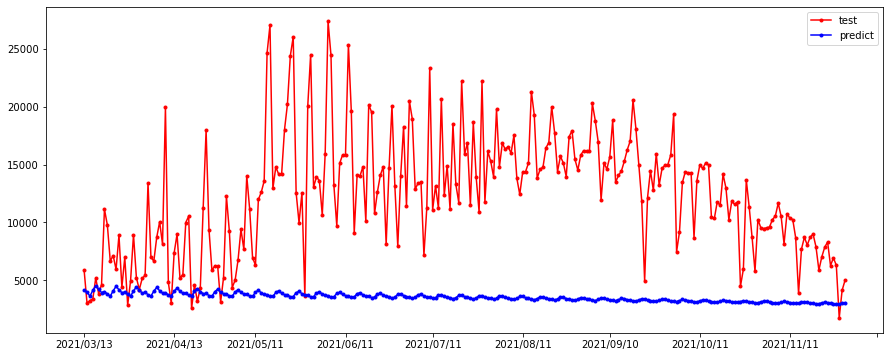

In [176]:
# make prediction
predictions = model_fit_s.predict(start=len(train), end=len(train)+len(test)-1, typ="levels", index=test.index)

plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(test, c="red", label="test", marker='.')
plt.plot(predictions, c="blue", label="predict", marker='.')
plt.legend()
fig.autofmt_xdate()

month_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(month_locator)

plt.show();

Model does not perform well. Will run a loop in the hopes of fine tuning the model.

In [150]:
# Run a loop throgh the model to find the best parameters 
best_MAE = float('inf')

for p in range(1,8):
    for d in range(0,3):
        for q in range(1,8):
            
            print(f"Trying values of {(p,d,q)}",end = "\r")
            
            model = SARIMAX(train,order = (p,d,q),
                           enforce_stationary = False,
                           enforce_invertibility = False,
                           trend = "t")
            
            model_fit = model.fit(maxiter = 2000)
            
            predictions = model_fit.predict(start=len(train),end = len(train) + len(test) - 1,typ="levels", index=test.index)
            
            current_MAE = mean_absolute_error(test[:10],predictions[:10])
            
            if (best_MAE > current_MAE):
                best_MAE = current_MAE
                print(f"Found new best MAE of {best_MAE} with values {(p,d,q)}")

Found new best MAE of 2032.9891831303266 with values (1, 0, 1)
Found new best MAE of 1983.487090351912 with values (1, 0, 6)
Found new best MAE of 1903.1770856519681 with values (1, 0, 7)
Found new best MAE of 1875.8007333558169 with values (4, 0, 6)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


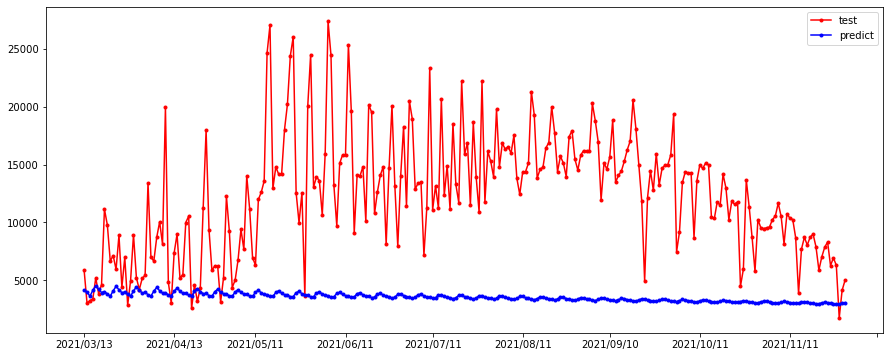

In [177]:
plt.figure(figsize=(15,6))
ax = plt.gca()
plt.plot(test, c="red", label="test", marker='.')
plt.plot(predictions, c="blue", label="predict", marker='.')
plt.legend()
fig.autofmt_xdate()

month_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(month_locator)

plt.show();

Not satisfied with this approach. Will try modelling and forecasting with `pyramid-arima` and `facebook-prophet`.

### Modelling with pyramid-arima

In [152]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(BikeShareTS, start_p=1, start_q=1,
                         test='adf',
                         max_p=7, max_q=7, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=31860.070, Time=2.42 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=32739.977, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=32134.766, Time=0.97 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=32110.786, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=32738.037, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=32567.369, Time=0.19 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=31921.840, Time=2.41 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=31881.173, Time=7.44 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=32108.677, Time=1.40 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=31983.419, Time=8.20 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=32016.908, Time=1.12 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=31832.164, Time=2.47 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=32569.272, Time=0.41 sec
 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=31946.449, Time=2.78 sec
 ARIMA(2,0,1)(0,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1759
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood              -15901.151
Date:                           Thu, 06 Jan 2022   AIC                          31812.303
Time:                                   18:43:22   BIC                          31839.645
Sample:                                        0   HQIC                         31822.409
                                          - 1759                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2375      0.020     61.737      0.000       1.198       1.277
ar.L2         -0.2376      0.020    -11.922      0.000      -0.277      -0.199
ma.L1         -0.8868      0.010    -86.006      0.000      -0.907      -0.867
ma.S.L7       -0.7934      0.010    -78.598      0.000      -0.813      -0.774
sigma2      4.464e+06   1.57e-10   2.85e+16      0.000    4.46e+06    4.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3153.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.83   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+32. Standard errors may be unstable.
"""

model has estimated the AIC and the P values of the coefficients look significant.
The best model SARIMAX(2, 0, 1)x(0, 1, 1, 7) has an AIC of 31812 and the P Values are significant.

### Forecasting with pyramid-arima

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


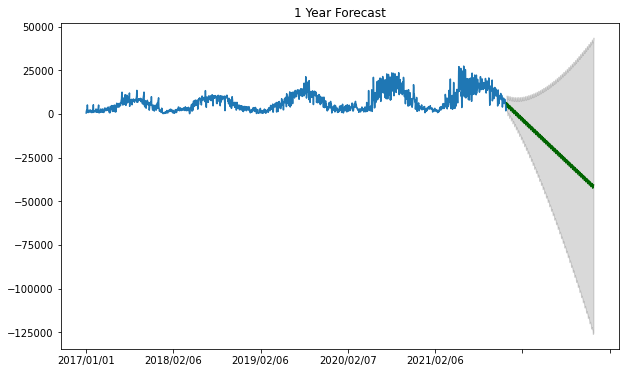

In [184]:
# Forecast
n_periods = 365
fc, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(BikeShareTS.trip_count), len(BikeShareTS.trip_count)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(10,6))
plt.plot(BikeShareTS.trip_count)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("1 Year Forecast")
ax = plt.gca()
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator)

plt.show()

This does not look successful. Will give it another appraoch. Will first create a new dataframe that has trip counts aggregated per month instead of per day. This is because Auto Arima Forecast does not take large number of points (from experience).

#### Creating monthly aggregated dataframe

In [154]:
BikeShareToronto_df2 = pd.read_csv("BikeShareTorontoFull_data.csv")
BikeShareToronto_df2.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,start_date,start_time,end_date,end_time
0,712382,2017-01-01 00:00:00,2017-01-01 00:03:00,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Annual Member,2017/01/01,00:00:00,2017/01/01,00:03:00
1,712383,2017-01-01 00:00:00,2017-01-01 00:05:00,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Annual Member,2017/01/01,00:00:00,2017/01/01,00:05:00
2,712384,2017-01-01 00:05:00,2017-01-01 00:29:00,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Annual Member,2017/01/01,00:05:00,2017/01/01,00:29:00
3,712385,2017-01-01 00:07:00,2017-01-01 00:21:00,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Annual Member,2017/01/01,00:07:00,2017/01/01,00:21:00
4,712386,2017-01-01 00:08:00,2017-01-01 00:12:00,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Annual Member,2017/01/01,00:08:00,2017/01/01,00:12:00


In [155]:
# set date index
BikeShareToronto_df2 = BikeShareToronto_df2.set_index(pd.DatetimeIndex(BikeShareToronto_df2['start_date']))

# aggregate by month
BikeShareToronto_df2 = BikeShareToronto_df2.groupby(pd.Grouper(freq="M")).count()

# change index name
BikeShareToronto_df2.index.names=["date"]

In [191]:
# Check
BikeShareToronto_df2.head()

,trip_count
date,
2017-01-31,41007
2017-02-28,41181
2017-03-31,46461
2017-04-30,61067
2017-05-31,82343


In [159]:
# Dropping columns
BikeShareToronto_df2.drop(columns=["trip_start_time", "trip_stop_time", "trip_duration_seconds", "from_station_id", "from_station_name", "to_station_id", "to_station_name", "user_type", "start_date", "start_time", "end_date", "end_time"],inplace=True)

In [160]:
# Renaming column
BikeShareToronto_df2.rename(columns={"trip_id":"trip_count"}, inplace=True)

In [ ]:
# Check
BikeShareToronto_df.head()

In [161]:
# Seasonal - fit stepwise auto-ARIMA
smodel2 = pm.auto_arima(BikeShareToronto_df2, start_p=1, start_q=1,
                         test='adf',
                         max_p=15, max_q=15, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1145.877, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1165.155, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1148.054, Time=0.04 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1149.415, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1186.423, Time=0.00 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1148.533, Time=0.02 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1147.324, Time=0.11 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1145.384, Time=0.11 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1147.282, Time=0.17 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1149.310, Time=0.07 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1147.965, Time=0.08 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=1144.495, Time=0.13 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1143.814, Time=0.08 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=1145.964, Time=0.03 sec
 ARIMA(2,0,1)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   59
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -565.318
Date:                            Thu, 06 Jan 2022   AIC                           1140.637
Time:                                    18:44:13   BIC                           1149.888
Sample:                                         0   HQIC                          1144.118
                                             - 59                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.936e+04   1.33e+04      2.202      0.028    3229.046    5.55e+04
ar.L1          0.9418      0.168      5.599      0.000       0.612       1.272
ar.L2         -0.4037      0.196     -2.055      0.040      -0.789      -0.019
ar.S.L12      -0.4042      0.229     -1.766      0.077      -0.853       0.044
sigma2      1.907e+09      0.044   4.32e+10      0.000    1.91e+09    1.91e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.43   Prob(JB):                         0.82
Heteroskedasticity (H):               1.82   Skew:                             0.22
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.81e+26. Standard errors may be unstable.
"""

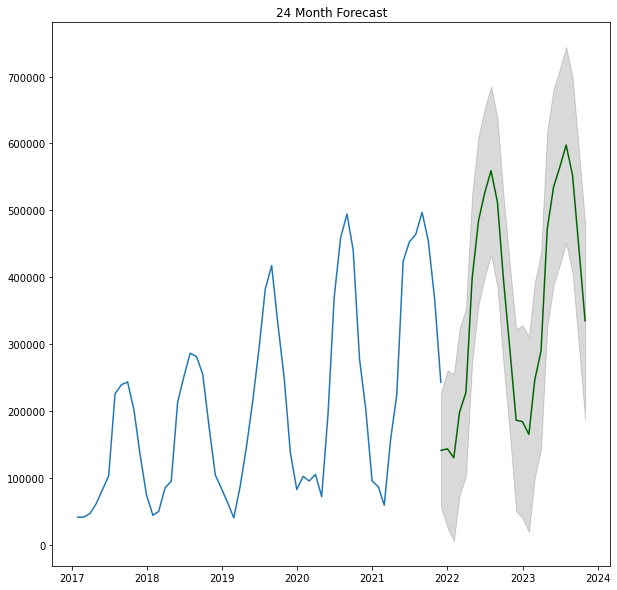

In [162]:
# Forecast - 2 years
n_periods = 24
fitted, confint = smodel2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(BikeShareToronto_df2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(10,10))
plt.plot(BikeShareToronto_df2)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("24 Month Forecast")
plt.show()

Finally, a forecasting graph that seems reasonable! 2022-2024 show an upward trend with seasonal drops. Going to give Facebook-prophet a go now.

### Facebook-Prophet
Will need to create a new dataframe called fp_df. This dataframe will contain the date and trip_count as columns and renamed **y** and **ds**. This format is required by the library itself. That being said, it needs to follow a certain datetime format as well.

In [193]:
fp_df = BikeShareTS

# Check
fp_df.head(3)

,trip_count,date
start_date,,
2017/01/01,487,2017-01-01
2017/01/02,1632,2017-01-02
2017/01/03,2013,2017-01-03


In [194]:
fp_df["date"] = fp_df.index

# Check
fp_df.head(3)

,trip_count,date
start_date,,
2017/01/01,487,2017/01/01
2017/01/02,1632,2017/01/02
2017/01/03,2013,2017/01/03


In [195]:
fp_df["date"] = pd.to_datetime(fp_df["date"]).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d'))
fp_df["date"] = pd.to_datetime(fp_df["date"])

In [198]:
fp_df = fp_df.reset_index(drop=True)

# rename column
fp_df.rename(columns={"trip_count": "y", "date":"ds"},inplace=True)

# check
fp_df

,y,ds
0,487,2017-01-01
1,1632,2017-01-02
2,2013,2017-01-03
3,1442,2017-01-04
4,1411,2017-01-05
...,...,...
1754,6943,2021-11-26
1755,6306,2021-11-27
1756,1759,2021-11-28
1757,4151,2021-11-29


In [199]:
fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       1759 non-null   int64         
 1   ds      1759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 27.6 KB


(1759, 2)


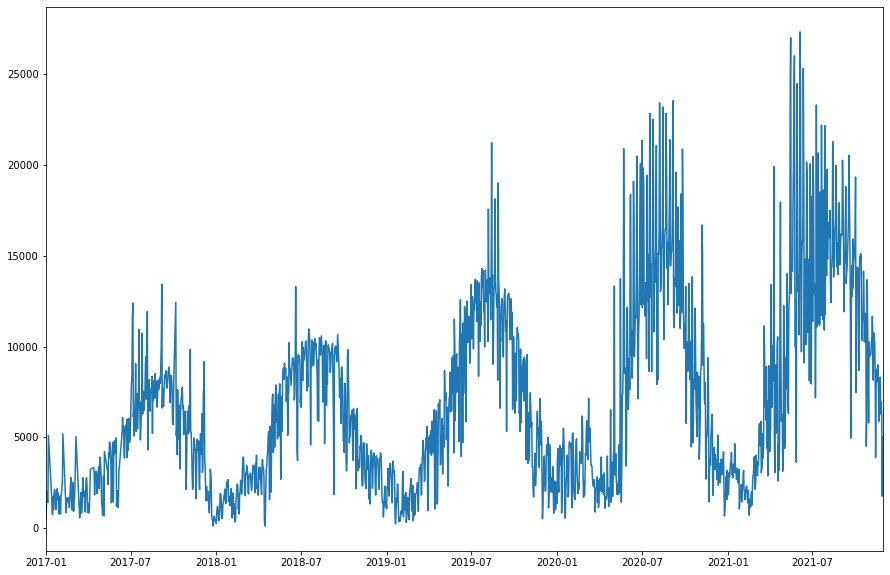

In [200]:
print(fp_df.shape)
plt.figure(figsize=(15,10))
plt.plot(fp_df['ds'], fp_df['y'])
plt.autoscale(enable=True, axis='x', tight=True)
plt.show();

Going to isolate the start of 2020  till the end of 2021 and see how well the model predicts and performs.

(1059, 2) (700, 2)


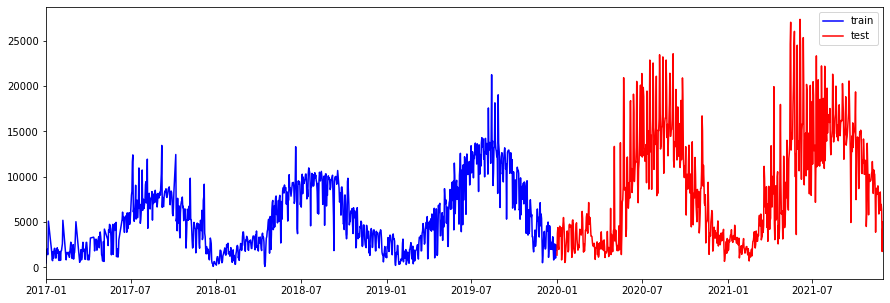

In [201]:
# Split the data up

train = fp_df.loc[fp_df.ds.dt.year < 2020,:]
test = fp_df.loc[fp_df.ds.dt.year >= 2020, :]
test_number = 700
print(train.shape, test.shape)

plt.figure(figsize=(15,5))
plt.plot(train['ds'],train['y'].values, c="blue", label="train")
plt.plot(test['ds'], test['y'].values, c="red", label="test")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show();

In [202]:
# fit the model
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

In [203]:
# Use this prediction model to compare to the ARIMA Model 
prediction_df = model.predict(test[:14])
prediction_df = prediction_df[['ds','yhat', 'yhat_lower', 'yhat_upper']]

In [204]:
# Forecasting model for train/test split. Blue/Red graph above
future = model.make_future_dataframe(periods=test_number, freq='D', include_history=False)

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

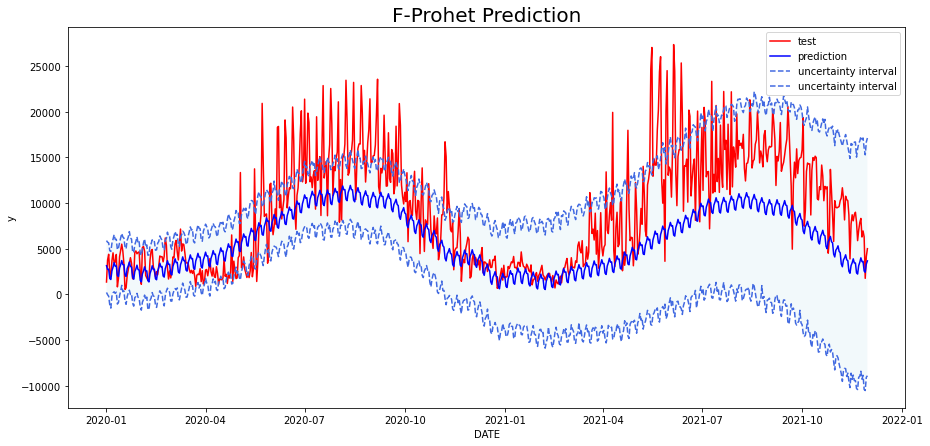

In [207]:
# plotting forecasting model (train/test)

plt.figure(figsize=(15,7))
plt.plot(test['ds'], test['y'].values, c="red", label="test")
plt.plot(test['ds'], forecast['yhat'].values, c="blue", label="prediction")
plt.plot(test['ds'], forecast['yhat_lower'].values, c="royalblue", label="uncertainty interval", linestyle='--')
plt.plot(test['ds'], forecast['yhat_upper'].values, c="royalblue", label="uncertainty interval", linestyle='--')
ax = plt.gca()
ax.fill_between(test['ds'],  forecast['yhat_lower'], forecast['yhat_upper'], facecolor='lightblue', alpha=0.15, interpolate=True)
plt.title('F-Prohet Prediction', fontsize=20)
plt.ylabel('y')
plt.xlabel('DATE')
plt.legend()
plt.show();

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))

The F-prophet model really does do a good job! Able to predict the sine wave like pattern! The uncertainty level does increase as it gets closer to the unknown.

#### Comparing SARIMA and F-Prophet

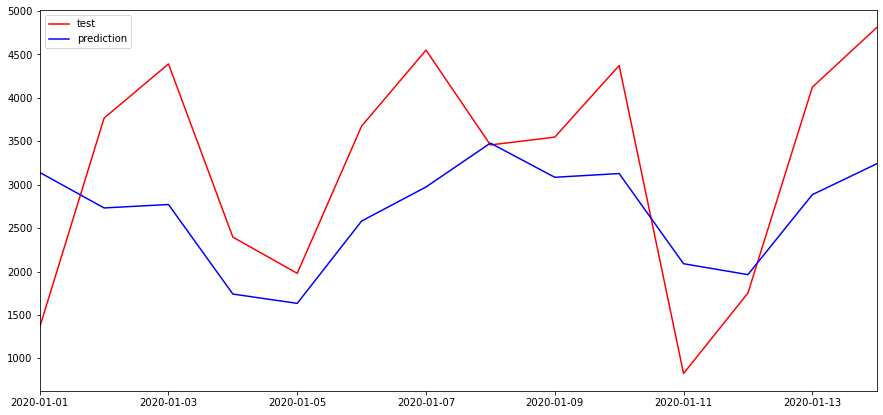

In [208]:
# Next 10 Days perdiction visualization
plt.figure(figsize=(15,7))
plt.plot(prediction_df['ds'], test.iloc[:14].loc[:,'y'].values, c="red", label="test")
plt.plot(prediction_df['ds'], prediction_df['yhat'].values, c="blue", label="prediction")
#plt.plot(prediction_df['ds'], prediction_df['yhat_lower'].values, c="royalblue", label="uncertainty interval", linestyle='--')
#plt.plot(prediction_df['ds'], prediction_df['yhat_upper'].values, c="royalblue", label="uncertainty interval", linestyle='--')
ax = plt.gca()
#ax.fill_between(prediction_df['ds'],  prediction_df['yhat_lower'], prediction_df['yhat_upper'], facecolor='lightblue', alpha=0.15, interpolate=True)
plt.legend()
ax.autoscale(enable=True, axis='x', tight=True)

plt.show();

In [209]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(test['y'][:14], forecast['yhat'][:14]))

MAE:  1008.6313355249789


In [210]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE: ", sqrt(mean_squared_error(test['y'][:14], forecast['yhat'][:14])))

RMSE:  1149.698209221044


The MAE value (1008.6) is way lower than the SARIMA (26428.5) model. The F-Prophet is definitely the better approach.

#### Predicting the next 2 years

In [214]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(fp_df)

In [215]:
future=m.make_future_dataframe(periods=730, freq="D")
forecast=m.predict(future)

In [216]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2484,2023-11-26,12750.926857,7637.772859,17757.408003,12105.438306,13458.012392,-94.469764,-94.469764,-94.469764,2791.259422,...,-133.608080,-133.608080,-133.608080,-2752.121105,-2752.121105,-2752.121105,0.0,0.0,0.0,12656.457093
2485,2023-11-27,12757.144255,7458.398428,17487.178142,12111.506026,13466.243762,-501.220331,-501.220331,-501.220331,2791.259422,...,-500.412051,-500.412051,-500.412051,-2792.067701,-2792.067701,-2792.067701,0.0,0.0,0.0,12255.923924
2486,2023-11-28,12763.361654,7186.667388,17393.265438,12117.573747,13474.451696,-313.021202,-313.021202,-313.021202,2791.259422,...,-274.533955,-274.533955,-274.533955,-2829.746669,-2829.746669,-2829.746669,0.0,0.0,0.0,12450.340452
2487,2023-11-29,12769.579052,8227.747455,18377.302775,12123.648843,13482.652150,336.955004,336.955004,336.955004,2791.259422,...,411.657756,411.657756,411.657756,-2865.962174,-2865.962174,-2865.962174,0.0,0.0,0.0,13106.534056
2488,2023-11-30,12775.796450,7355.967328,17781.100350,12129.726771,13490.699670,-184.317191,-184.317191,-184.317191,2791.259422,...,-74.030929,-74.030929,-74.030929,-2901.545684,-2901.545684,-2901.545684,0.0,0.0,0.0,12591.479259


In [220]:
# relavent columns
forecast[["ds","yhat"]]

,ds,yhat
0,2017-01-01,-731.049871
1,2017-01-02,-1063.355593
2,2017-01-03,-795.124140
3,2017-01-04,-59.679584
4,2017-01-05,-490.312052
...,...,...
2484,2023-11-26,12656.457093
2485,2023-11-27,12255.923924
2486,2023-11-28,12450.340452
2487,2023-11-29,13106.534056


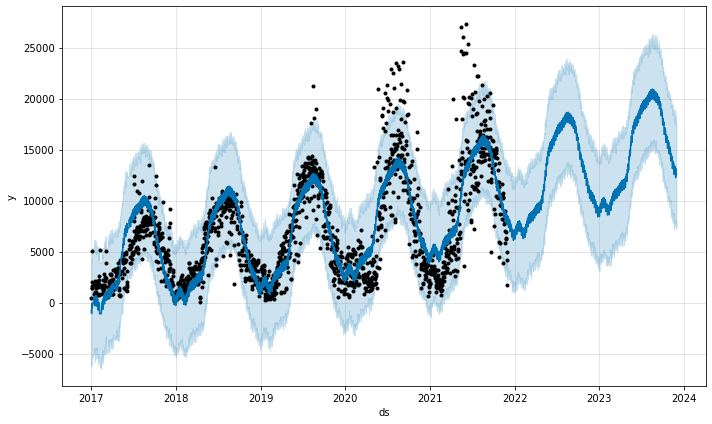

In [218]:
plot1 = m.plot(forecast)

The black dots represent real points while the dark blue line is the prediction. The light blue shaded regions are the uncertainty region. The plot shows an upward trend which is very similar to the pyramid-arima plot. Time to dissect this trend into smaller observations. 

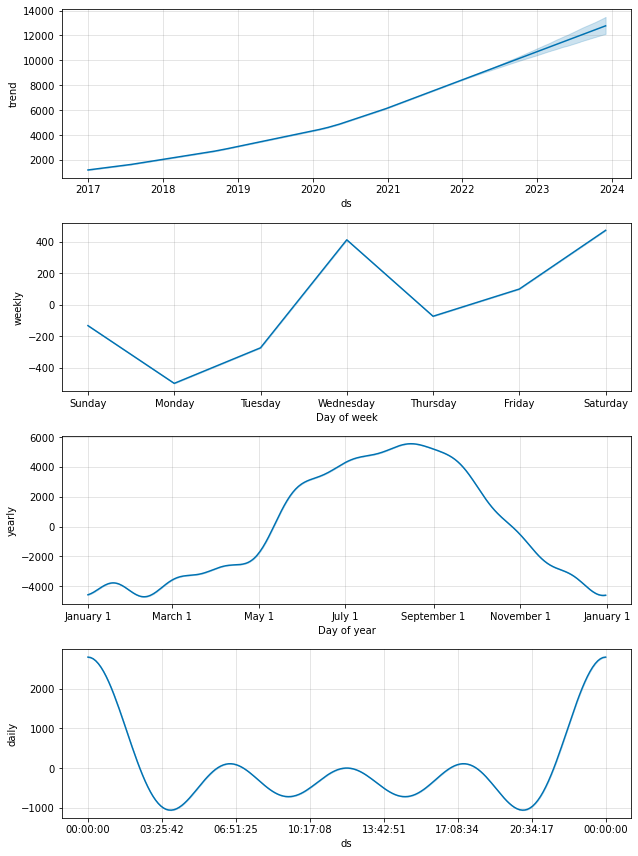

In [219]:
plot2 = m.plot_components(forecast)

**Trend**: An upward trend is seen all the way to the end of 2023. I notice a small upward elbow mid 2020 that increases the graph’s slow. Interesting to see! 

**Weekly**: Monday is predicted to have the lowest usage (I wouldn’t want to spring back into physical activity right after a weekend haha). Seems to peak on Wednesday, drop to Thursday and spoke itself back up all the way through Saturday. 

**Yearly**: Can expect the majority of people starting to ride bikes during the month of May till about November. Bike usage is predicted to peak during August-September. I expect more bike repairs to happen during this period.

**Daily**: There seems to be a small spike around 6 am, noon and 5 pm. I assume this corresponds to the schedules of the working class. Bike rides are forecasted to peak during late night/midnight.

### Summary
This project has been a learning experience! Got to test the stationarity of data through ADF and KPSS tests. Made acf and p_acf plots that helped me pick p,q and d values. Explored the SARINA and F-prophet model where I got to compare MAE values. For this project, the F-prophet model was more successful. 

#### Future work
Potentially fine tune my models to achieve better MAE values. 